In [12]:
import pandas as pd
import numpy as np
from transformers import BertTokenizer
from transformers import RobertaTokenizer
from transformers import RobertaTokenizerFast

%matplotlib inline

In [2]:
train = pd.read_csv('../input/tweet-sentiment-extraction/train.csv')

In [3]:
tokenizer = RobertaTokenizer.from_pretrained('../../bert_models/roberta_base/')

In [4]:
train.dropna(subset=['text','selected_text'], how='any', inplace=True)

In [5]:
train['text'] = train['text'].apply(lambda x: ' '.join(x.lower().strip().split()))
train['selected_text'] = train['selected_text'].apply(lambda x: ' '.join(x.lower().strip().split()))

In [6]:
def find_starts(text, st):
    end_pos = 0
    start_pos = text.find(st, end_pos)
    ret = []
    while start_pos>=0:
        end_pos = start_pos+len(st)
        ret.append(start_pos)
        start_pos = text.find(st, end_pos)
    return ret

In [7]:
train['starts'] = train.apply(lambda x: find_starts(x['text'], x['selected_text']), axis=1)

In [10]:
train['starts_num'] = train['starts'].apply(lambda x: len(x))

In [11]:
train.head()

,textID,text,selected_text,sentiment,starts,starts_num
0,cb774db0d1,"i`d have responded, if i were going","i`d have responded, if i were going",neutral,[0],1
1,549e992a42,sooo sad i will miss you here in san diego!!!,sooo sad,negative,[0],1
2,088c60f138,my boss is bullying me...,bullying me,negative,[11],1
3,9642c003ef,what interview! leave me alone,leave me alone,negative,[16],1
4,358bd9e861,"sons of ****, why couldn`t they put them on th...","sons of ****,",negative,[0],1


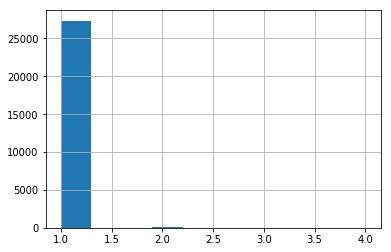

In [13]:
train['starts_num'].hist()

In [14]:
train['starts_num'].describe()

count    27480.000000
mean         1.005422
std          0.079618
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          4.000000
Name: starts_num, dtype: float64